Removed no burn in
Best fit sample -log(Like) = 0.785518
Ln(mean 1/like) = 8.274407
mean(-Ln(like)) = 5.573622
-Ln(mean like)  = 4.104870
2*Var(Ln(like)) = 8.624434

parameter   bestfit        lower1         upper1         lower2         upper2
omega_b     2.2746639E-02  2.0713432E-02  2.4288418E-02  2.0711373E-02  2.4288418E-02   $\omega_{\rm b}$
omega_cdm   1.2010756E-01  1.1668937E-01  1.2364393E-01  1.1618380E-01  1.2478571E-01   $\omega_{\rm cdm}$
sigma8_m    7.9931982E-01  7.7219696E-01  8.7337780E-01  7.6556950E-01  8.8267150E-01   $\sigma_8$
n_s         9.5972767E-01  9.1486994E-01  1.0110025E+00  9.1234254E-01  1.0147259E+00   $n_{\rm s}$
logM_cut    1.2543385E+01  1.2502141E+01  1.2979494E+01  1.2502141E+01  1.3083919E+01   $\log M_{\rm cut}$
logM_1      1.4054236E+01  1.3732863E+01  1.5061978E+01  1.3660693E+01  1.5082259E+01   $\log M_1$
sigma      -2.7544962E+00 -2.9792443E+00 -2.8110361E-01 -2.9792443E+00 -2.8110361E-01   $\log \sigma$
alpha       1.0946578E+00  3.1947390

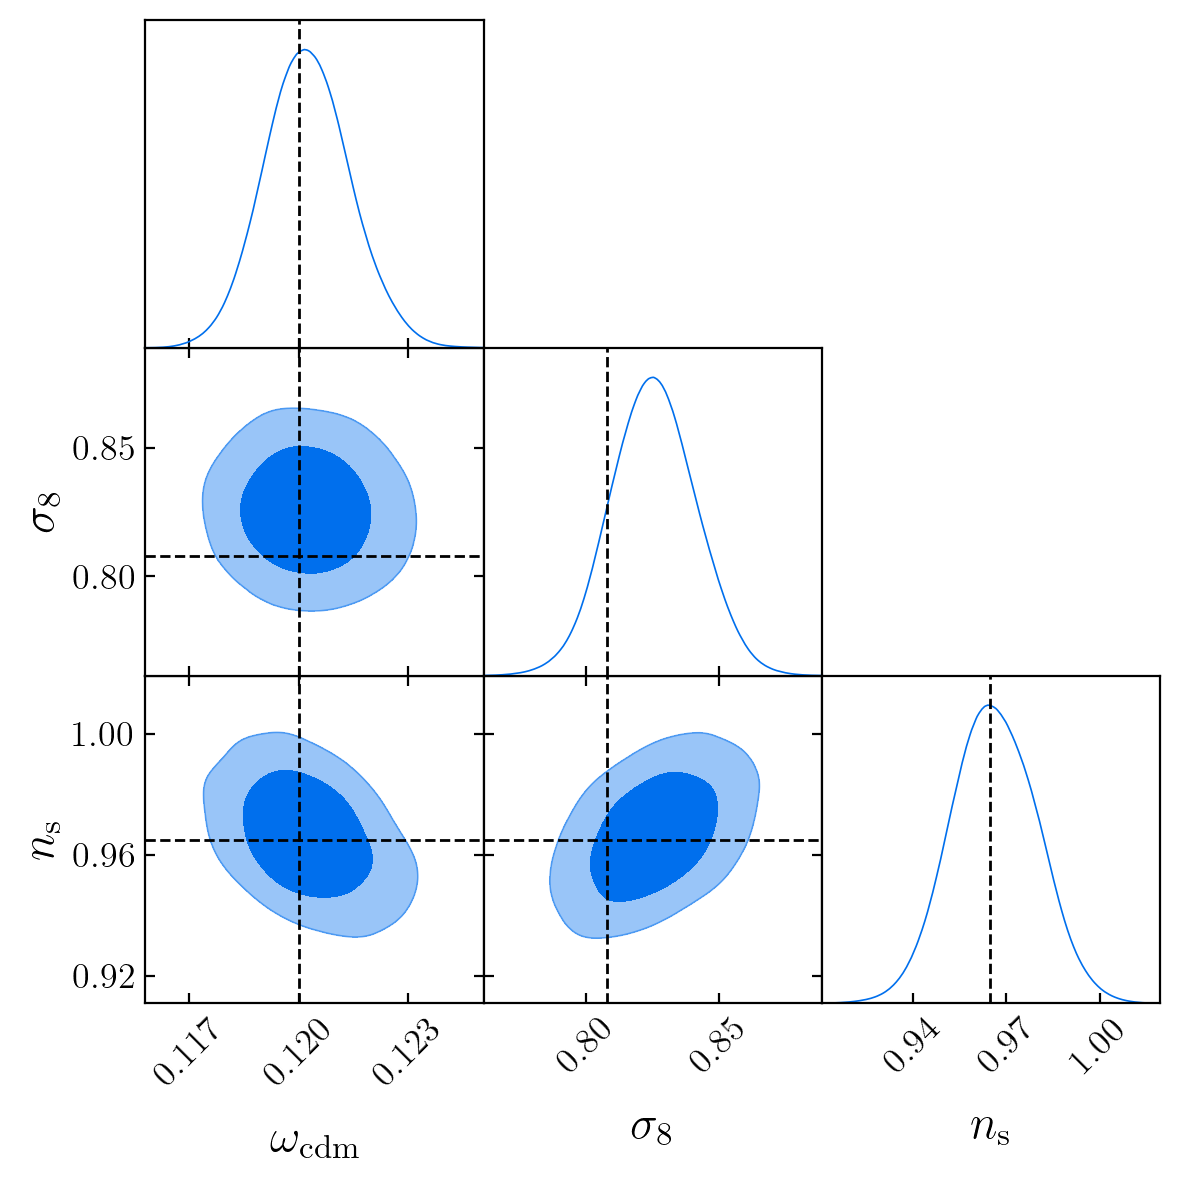

In [6]:
import matplotlib.pyplot as plt
from pathlib import Path
from getdist import plots, MCSamples
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'tpcf+dsc_conf': 'Galaxy 2PCF + DSC',
}


chains = []

hod_idx = 430
smin = 0
kmin, kmax = 0.0, 1.0
# truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))
legend_labels = []
# print(truth)

params = ['omega_cdm', 'sigma8_m', 'n_s']
# params = ['omega_cdm', 'sigma8_m', 'n_s', 'logM_cut', 'logM_1']
# params = ['B_cen', 'B_sat']

data_dir = f'/pscratch/sd/e/epaillas/emc/chains/projection_effects/'
data_fn = Path(data_dir) / f"pk_chain_nact2048.npy"
data = np.load(data_fn, allow_pickle=True).item()
samples = MCSamples(
            samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[data['labels'][n] for n in data['names']],
            loglikes=-data['log_likelihood'],
        )
chains.append(samples)
maxl = data['samples'][data['log_likelihood'].argmax()]
legend_labels.append(r'$P(k)$')
# params = data['names']
print(samples.getLikeStats())
markers = data['markers']
    
g = plots.get_subplot_plotter()
g.settings.constrained_layout = False
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
# g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd'][::-1]
# g.settings.line_styles = g.settings.solid_colors

g.triangle_plot(
    roots=chains,
    # legend_labels=legend_labels,
    # legend_labels=[r'$\textrm{Galaxy } w_p$', r'$+ \textrm{ Density-split }\xi_\ell$', r'$+ \textrm{ Galaxy }\xi_\ell$'],
    markers=markers,
    params=params,
    filled=True,
    # filled=[False, True, True, True, True],
    # title_limit=1,
    # params=['logM_cut', 'logM_1', 'sigma', 'kappa', 'alpha']
    # legend_labels=stats
)



In [33]:
print(data['samples'][data['log_likelihood'].argmax()])
print(data['log_likelihood'].max())

[ 0.02299196  0.12110315  0.8212669   0.96855951 12.58239927 14.12158837
 -0.98322748  0.78781304  0.04212929  0.32882178  0.84752994 -0.31483968
 -0.82627877 -0.70518491 -0.33149368  0.21450519]
-0.7740050139109328


In [2]:
data['samples'].shape

(11481, 16)